## Normal Inverse Tranform for discrete

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
import scipy.special as spsp

### Example

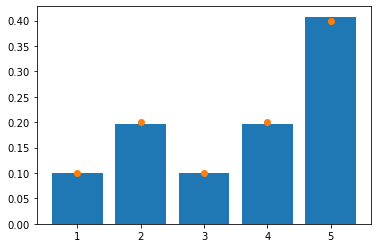

In [28]:
def sampling():
    x = np.random.rand()
    if x <= 0.4:
        return 5
    elif x <= 0.6:
        return 4
    elif x <= 0.8:
        return 2
    elif x <= 0.9:
        return 1
    else:
        return 3

samples = [sampling() for i in range(10000)]
values,counts = np.unique(samples,return_counts = True)
plt.bar(values,counts/10000,zorder = 0)
x = [1,2,3,4,5]
y = [0.1,0.2,0.1,0.2,0.4]
plt.scatter(x,y)

### Unifrom Distribution

In [36]:
#sample from uniform distribution from 1,...n
n = 8
x = np.random.rand(10000)
X = np.floor(n * x) + 1
value,counts = np.unique(X, return_counts = True)

<BarContainer object of 8 artists>

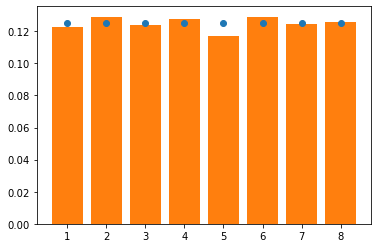

In [37]:
x = np.arange(1,9)
pdf = np.repeat(1/8,8)
plt.scatter(x,pdf)
plt.bar(value,counts/10000,zorder = 0)
#Remember, discrete use bar chart. Hist is for continous

### Geometric Distribution

<BarContainer object of 13 artists>

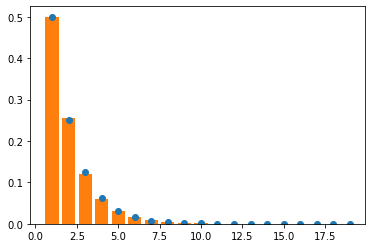

In [38]:
# Sx = {1,2,3,4,.......}
# p(x) = p * (1-p)^(x-1)
# F(x) = 1 - (1-p)^x
# x = logU / log(1-p)
p=0.5

x = np.arange(1,20)
y = p *(1-p)**(x-1)
plt.scatter(x,y)

X = np.floor(np.log(np.random.rand(10000))/(np.log(1-p)))+1

values,counts = np.unique(X,return_counts = True)
plt.bar(values,counts/10000,zorder = 0)

### Bernoulli Distribution

The idea is that we can use geometric to recreate bernoulli distribution. 
We first sample from a geometric, the return value would be the position of the first 1 appered.
We continued unitl we are running out.

In [3]:
def bern_rvs(p,n):
    x = np.zeros(n+1)
    N = 0
    while (N<n):
        N += spst.geom.rvs(p)
        if N <= n:
            x[N] = 1
    return x[1:]
    
bern_rvs(0.5,20)

array([0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1.])

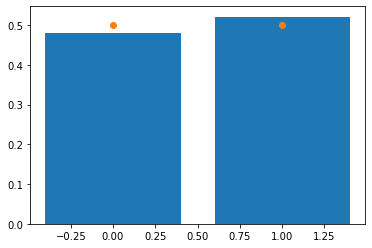

In [7]:
value,counts = np.unique(bern_rvs(0.5,1000),return_counts = True)
plt.bar(value,counts/1000,zorder = 0)
x = [0,1]
pdf =[0.5,0.5]
plt.scatter(x,pdf)

### Binomial Distribution

We can sample Binomial Distribution using its relationship between P(x+1) and P(x)

In [19]:
def sampling(p,n):
    i = 0
    pr = (1-p)**n
    F = pr
    U = spst.uniform.rvs()
    while U > F:
        pr = (n-i)*p/(i+1)/(1-p)*pr 
        F += pr
        i += 1
    return i
    

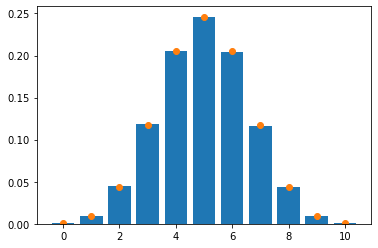

In [25]:
samples = [sampling(0.5,10) for i in range(100000)]
values,counts = np.unique(samples,return_counts = True)
plt.bar(values,counts/100000,zorder = 0)
x = np.arange(0,11)
plt.scatter(x,spst.binom.pmf(x,10,0.5))

### Poisson Distribution

The idea is the same as Binomial Distribution. 

In [37]:
def sampling(lmbda):
    pr = np.exp(-lmbda)
    F = pr
    i = 0
    U = spst.uniform.rvs()
    while U > F:
        pr = pr * lmbda/(i+1)
        F = F + pr
        i += 1
    return i
    

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 24]


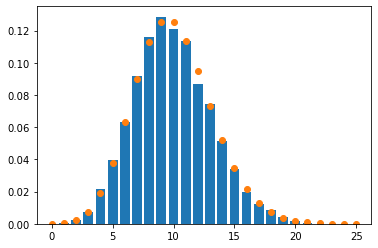

In [48]:
samples = [sampling(10) for i in range(10000)]
values,counts = np.unique(samples,return_counts = True)
print(values)
plt.bar(values,counts/10000,zorder = 0)
x = np.arange(0,26)
plt.scatter(x,spst.poisson.pmf(x,10))

## Change Search Sequence

If we need to make a sequence of comparisons to use the inverse method, then the way to minimize the run-time is to check the most likely values first, and go in descending order of probability of occurring. 

### For Finite Distribution

In [56]:
def sampling(x,p,m):
    #here x stands for values
    # p stands for probabilities
    # m stands for how many samples I want to generate
    Us = spst.uniform.rvs(size = m)
    X = np.zeros(m)
    n = len(x)
    p_inds = np.argsort(p)
    p_sort = np.flip(p[p_inds])
    x_sort = np.flip(x[p_inds])
    F_sort = np.cumsum(p_sort)
    for i in range(m):
        U = Us[i]
        j = 0
        while j < n-1:
            if U <= F_sort[j]:
                break
            else:
                j += 1
        X[i] = x_sort[j]
    return X




In [67]:
x = np.array([1, 2, 3, 4, 5])
p = np.array([0.1, 0.1, 0.2, 0.5, 0.1])
X = sampling(x, p, 10000)
print(np.mean(X==1))
print(np.mean(X==2))
print(np.mean(X==3))
print(np.mean(X==4))
print(np.mean(X==5))

0.0971
0.1029
0.1983
0.4967
0.105


### For infinite Distribution

Things are not as easy in infinite case. You can't just list all the probabilities and values.
Instead you have to pick the one that has the largest probability.
What you can do is examine on p(x+1)/p(x)

In [72]:
def PoissonSearch(lmbda):
    i  = 0
    pr = np.exp(-lmbda)
    F = pr
    while i < int(np.floor(lmbda)):
        pr = pr * lmbda /(i+1)
        F = F + pr
        i += 1
    U = spst.uniform.rvs()
    if F > U:
        while F > U:
            F = F - pr
            pr = i * pr / lmbda
            i = i - 1
        return i+1
    elif F < U:
        while F < U:
            i = i + 1
            pr = lmbda / i * pr
            F = F + pr
        return i
    else:
        return i
        

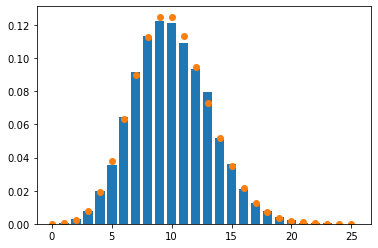

In [74]:
samples = [PoissonSearch(10) for i in range(10000)]
values,counts = np.unique(samples,return_counts = True)
plt.bar(values,counts/10000,zorder = 0)
x = np.arange(0,26)
plt.scatter(x,spst.poisson.pmf(x,10))